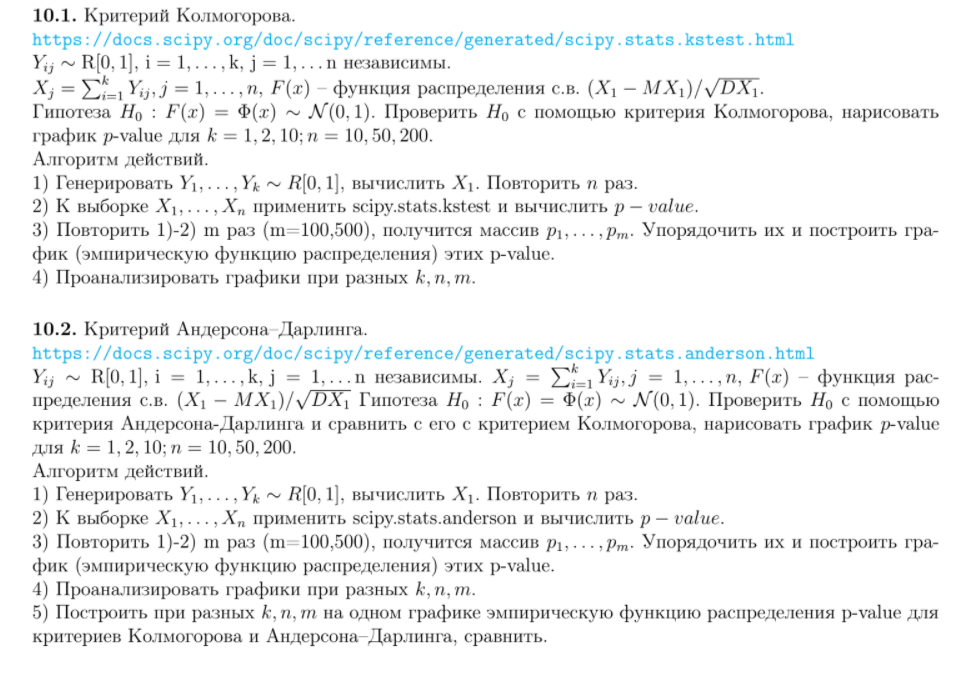

In [1]:
from IPython.display import Image

display(Image(filename="task_10.png", width=800))

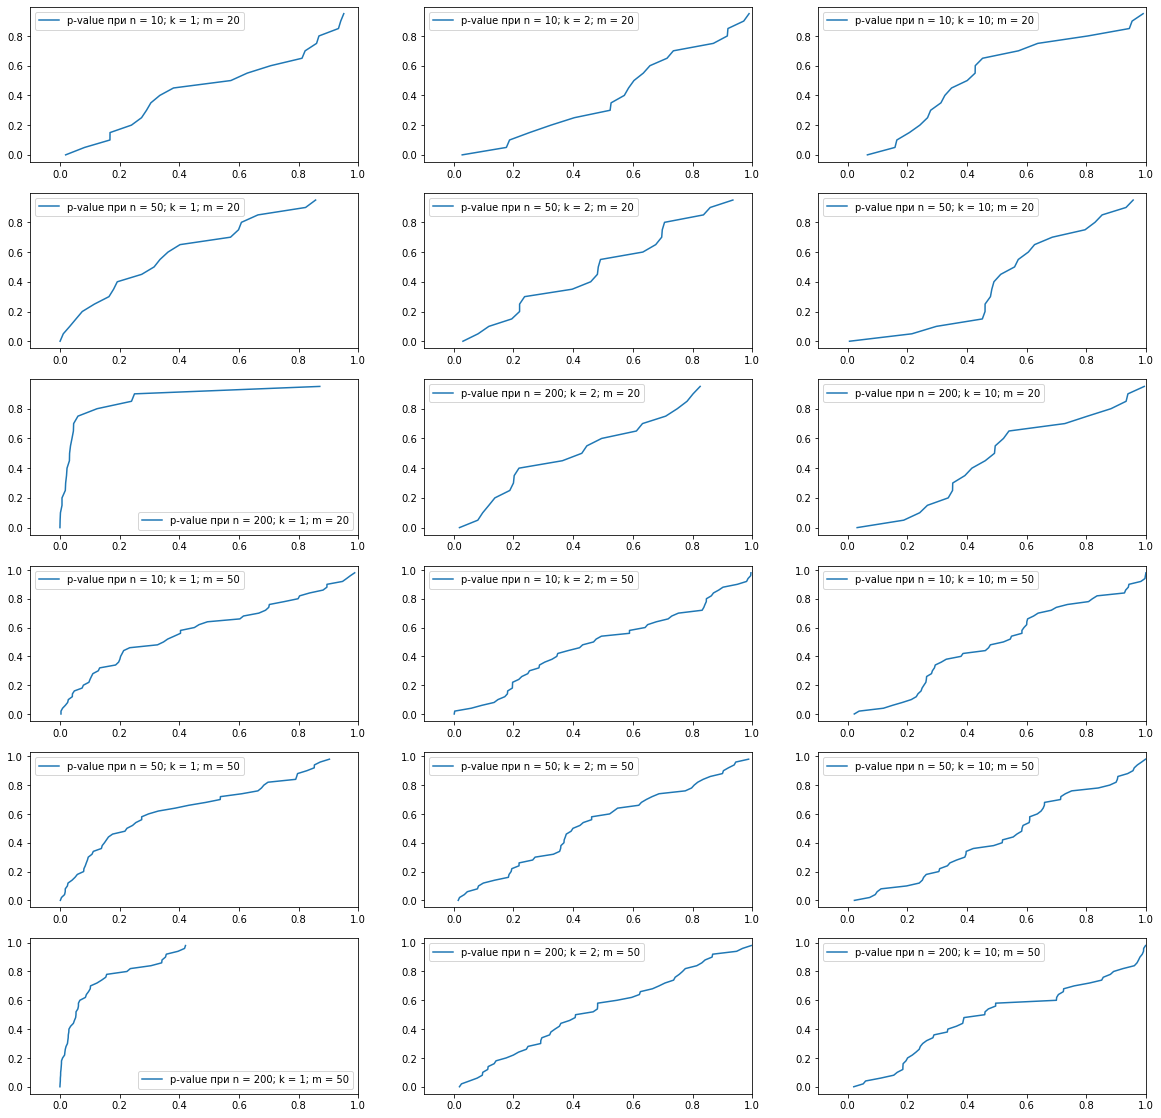

In [10]:
from scipy.stats import kstest, uniform, norm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
k = [1, 2, 10]
n = [10, 50, 200]
m = [20, 50]
for i in range(len(n)):
    for j in range(len(k)):
        for d in range(len(m)):
            pvalue = []
            for u in range(m[d]):
                X = []
                for l in range(n[i]):
                    Y = uniform.rvs(size=k[j])
                    X.append(np.sum(Y))
                EX = k[j] / 2
                DX = k[j] / 12
                X = np.array(X)
                pvalue.append(kstest((X - EX) / np.sqrt(DX), norm.cdf).pvalue)
            pvalue.sort()
            x1 = np.arange(0, 1, 1 / m[d])
            plt.subplot(
                len(n) * len(m), len(k), d * len(k) * len(n) + i * len(k) + j + 1
            )
            plt.plot(
                list(map(lambda x1: pvalue[int(x1 * m[d])], x1)),
                x1,
                label=(
                    "p-value при n = "
                    + str(n[i])
                    + "; k = "
                    + str(k[j])
                    + "; m = "
                    + str(m[d])
                ),
            )
            plt.xlim(-0.1, 1)
            plt.legend()
plt.show()

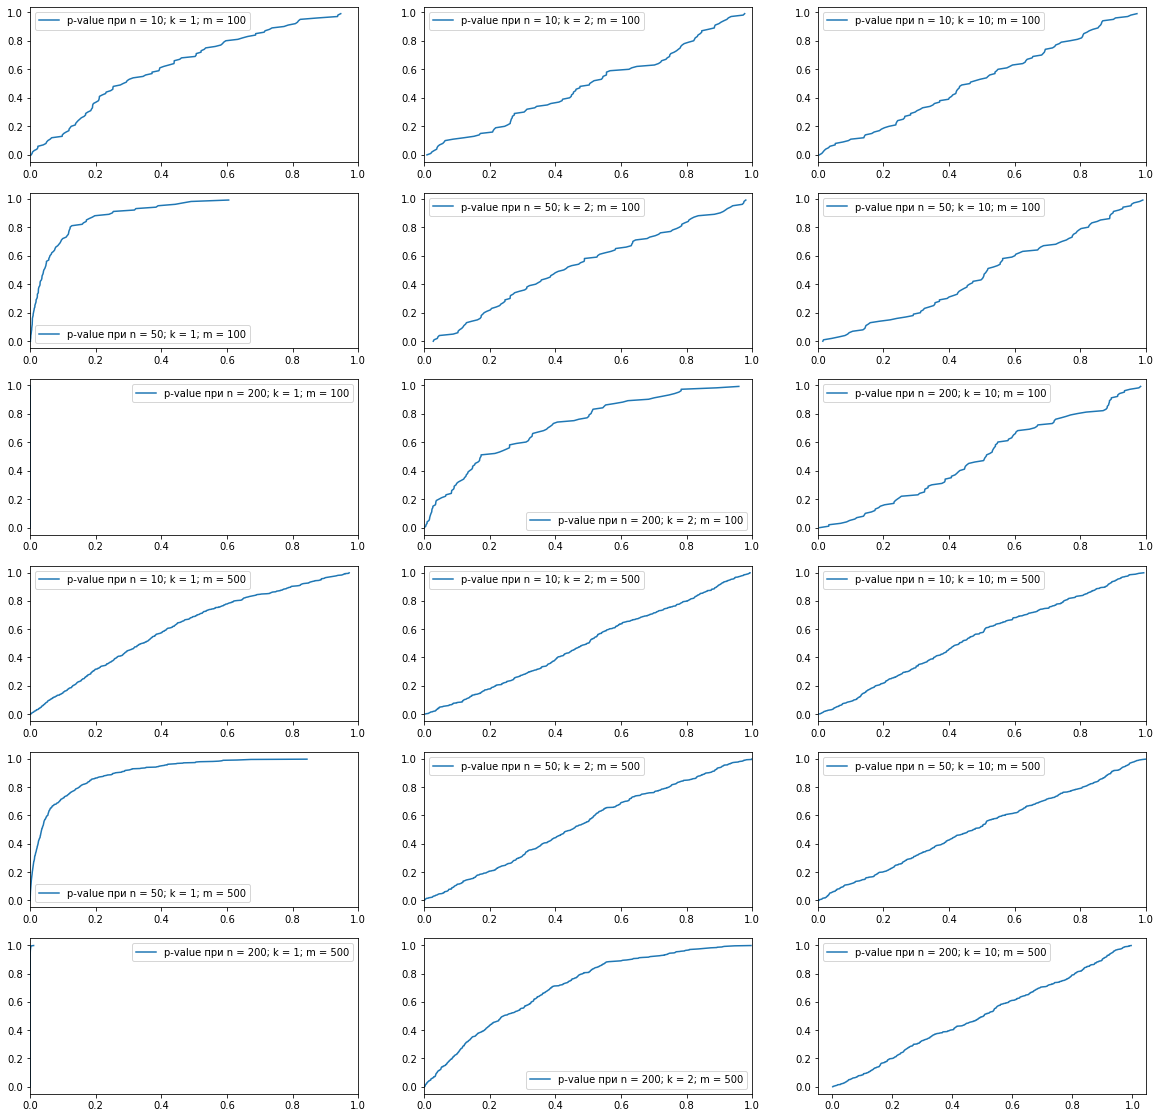

In [5]:
plt.figure(figsize=(20, 20))
k = [1, 2, 10]
n = [10, 50, 200]
m = [100, 500]
for i in range(len(n)):
    for j in range(len(k)):
        for d in range(len(m)):
            pvalue = []
            for u in range(m[d]):
                X = []
                for l in range(n[i]):
                    Y = uniform.rvs(size=k[j])
                    X.append(np.sum(Y))
                EX = k[j] / 2
                DX = k[j] / 12
                AD = anderson((X - EX / np.sqrt(DX)), "norm").statistic * (
                    1 + 0.75 / n[i] + 2.25 / (n[i]) ** 2
                )
                p = 0
                if AD >= 0.6:
                    p = np.exp(1.2937 - 5.709 * (AD) + 0.0186 * (AD) ** 2)
                if 0.34 < AD < 0.6:
                    p = np.exp(0.9177 - 4.279 * (AD) - 1.38 * (AD) ** 2)
                if 0.2 < AD < 0.34:
                    p = 1 - np.exp(-8.318 + 42.796 * (AD) - 59.938 * (AD) ** 2)
                if AD <= 0.2:
                    p = 1 - np.exp(-13.436 + 101.14 * (AD) - 223.73 * (AD) ** 2)
                pvalue.append(p)
            pvalue.sort()
            x1 = np.arange(0, 1, 1 / m[d])
            plt.xlim(0, 1)
            plt.subplot(
                len(n) * len(m), len(k), d * len(k) * len(n) + i * len(k) + j + 1
            )
            plt.plot(
                list(map(lambda x1: pvalue[int(x1 * m[d])], x1)),
                x1,
                label=(
                    "p-value при n = "
                    + str(n[i])
                    + "; k = "
                    + str(k[j])
                    + "; m = "
                    + str(m[d])
                ),
            )
            plt.legend()
plt.show()

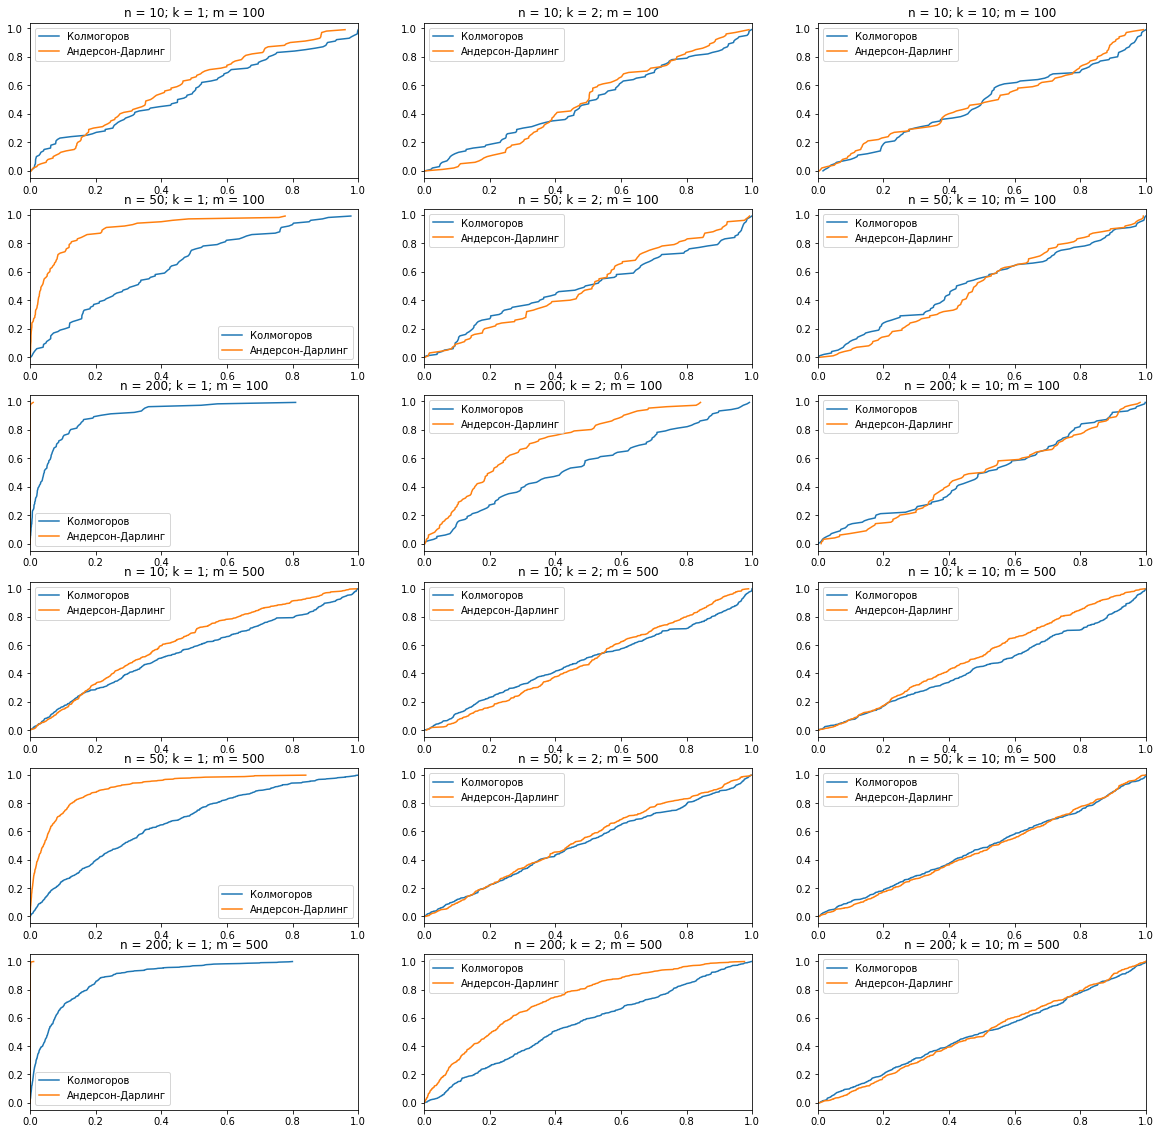

In [11]:
plt.figure(figsize=(20, 20))
k = [1, 2, 10]
n = [10, 50, 200]
m = [100, 500]
for i in range(len(n)):
    for j in range(len(k)):
        for d in range(len(m)):
            pvalue_AD = []
            pvalue_K = []
            for u in range(m[d]):
                X = []
                for l in range(n[i]):
                    Y = uniform.rvs(size=k[j])
                    X.append(np.sum(Y))
                EX = k[j] / 2
                DX = k[j] / 12
                X = np.array(X)
                pvalue_K.append(kstest(((X - EX) / np.sqrt(DX)), norm.cdf).pvalue)
                AD = anderson((X - EX / np.sqrt(DX)), "norm").statistic * (
                    1 + 0.75 / n[i] + 2.25 / (n[i]) ** 2
                )
                p = 0
                if AD >= 0.6:
                    p = np.exp(1.2937 - 5.709 * (AD) + 0.0186 * (AD) ** 2)
                if 0.34 < AD < 0.6:
                    p = np.exp(0.9177 - 4.279 * (AD) - 1.38 * (AD) ** 2)
                if 0.2 < AD < 0.34:
                    p = 1 - np.exp(-8.318 + 42.796 * (AD) - 59.938 * (AD) ** 2)
                if AD <= 0.2:
                    p = 1 - np.exp(-13.436 + 101.14 * (AD) - 223.73 * (AD) ** 2)
                pvalue_AD.append(p)
            pvalue_K.sort()
            pvalue_AD.sort()
            x1 = np.arange(0, 1, 1 / m[d])
            plt.subplot(
                len(n) * len(m), len(k), d * len(k) * len(n) + i * len(k) + j + 1
            )
            plt.title("n = " + str(n[i]) + "; k = " + str(k[j]) + "; m = " + str(m[d]))
            plt.xlim(0, 1)
            plt.plot(
                list(map(lambda x1: pvalue_K[int(x1 * m[d])], x1)),
                x1,
                label=("Колмогоров"),
            )
            plt.plot(
                list(map(lambda x1: pvalue_AD[int(x1 * m[d])], x1)),
                x1,
                label=("Андерсон-Дарлинг"),
            )
            plt.legend()
plt.show()